# Wine Dataset (KNN)


---


O Wine dataset é um conjunto de dados da biblioteca sklearn, que contém informações químicas de três diferentes tipos de vinho cultivados na mesma região da Itália. São 178 amostras, cada uma com 13 características numéricas, como teor alcoólico e pH. O objetivo é classificar cada amostra em uma das três classes correspondentes aos tipos de vinho. **Vamos utilizar o algoritmo KNN para classificar os vinhos!**


---



## Imports

In [124]:
# Visualização
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Manipulação de dados
import numpy as np
import pandas as pd

# Datasets
from sklearn.datasets import load_wine

# Modelos
from sklearn.neighbors import KNeighborsClassifier

# Pré-processamento e divisão
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Avaliação
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Carregando dados e dividindo conjunto em treino e teste

In [125]:
# Carregando o conjunto de dados

wine = load_wine(as_frame=True)
df = wine.frame

print("{} linhas e {} colunas no conjunto de dados".format(*df.shape))

178 linhas e 14 colunas no conjunto de dados


In [126]:
# Features(X) e Target(y)

X = df.drop(columns="target")
y = df["target"]

In [127]:
# Normalizando os dados

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [128]:
# Divindo o dataset em conjuntos de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=12, stratify=y)

## Instância e avaliação do modelo

In [129]:
# Instanciar e treinar o modelo

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predição

y_pred = knn.predict(X_test)

In [130]:
# Avaliação Breve

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.86      0.92        14
           2       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36




*   Precision (precisão): entre os exemplos que o modelo classificou como positivos, quantos estavam corretos?
*   Recall (revocação): entre os exemplos positivos reais, quantos o modelo identificou corretamente?
*   F1-Score: equilíbrio entre precisão e revocação. Ideal quando há classes desbalanceadas.












## Encontrando o K Ideal

No algoritmo KNN, o parâmetro K determina o número de vizinhos mais próximos considerados para a tomada da decisão de classificação. Esse valor não pode ser nem muito grande, nem muito pequeno para evitar problemas de classificação.

Nesse caso, encontraremos o valor ideal de K de maneira manual, ou seja, treinando o modelo repetidamente até encontrarmos o valor de K que tenha as métricas de avaliação mais positivas.

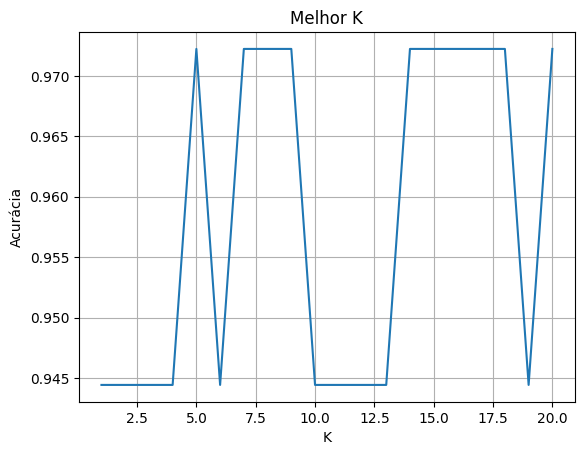

In [131]:
# Testando o modelo com outros valores de K

scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.plot(range(1, 21), scores)
plt.xlabel('K')
plt.ylabel('Acurácia')
plt.title('Melhor K')
plt.grid(True)
plt.show()

### Modelo Final

In [132]:
# Instanciar um modelo com k = 17 (ideal, por tentativa e erro. 7 e 8 também geraram resultados ótimos)

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



## Visualização

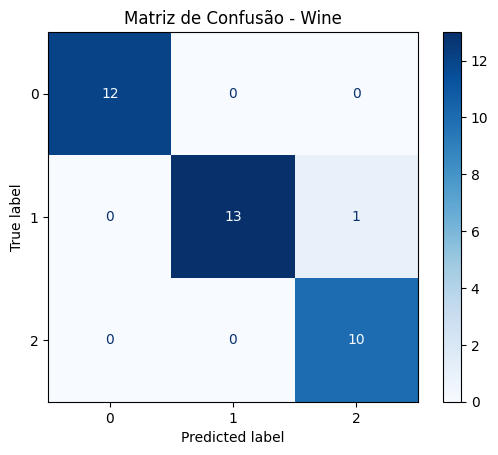

In [133]:
# Matriz de confusão

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap ='Blues')
plt.title('Matriz de Confusão - Wine')
plt.grid(False)
plt.show()

### PCA - Principal Components Analysis

PCA (Análise de Componentes Principais) é uma técnica de redução de dimensionalidade que ajuda a diminuir o número de características de um conjunto de dados, preservando a maior parte das informações importantes. Ela remove redundâncias nos dados, melhora a eficiência computacional e facilita a visualização, especialmente quando lidamos com conjuntos de dados de muitas dimensões.

Utilizaremos essa técnica para reduzir o nosso conjunto de dados para somente duas features. Isso vai permitir visualizarmos a fronteira de decisão do modelo em duas dimensões!

In [134]:
# PCA para reduzir dimensionalidade

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [135]:
# Avaliando o PCA

print(pca.explained_variance_ratio_) # Variância explicada
print(pca.explained_variance_ratio_.cumsum()) # Variância explicada acumulada

[0.36198848 0.1920749 ]
[0.36198848 0.55406338]


In [136]:
# Divindo o dataset em conjuntos de treino e teste com PCA

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=12, stratify = y)

In [137]:
# Treinando um modelo com PCA

knn_pca = KNeighborsClassifier(n_neighbors=17)
knn_pca.fit(X_train_pca, y_train_pca)

KNeighborsClassifier(n_neighbors=17)

### Comparando o modelo original x PCA

In [138]:
# Modelo original

y_pred_model = knn.predict(X_test)
print("Classification Report - Modelo Original:\n")
print(classification_report(y_test, y_pred_model))

# Modelo com PCA

y_pred_model_pca = knn_pca.predict(X_test_pca)
print("\nClassification Report - Modelo com PCA:\n")
print(classification_report(y_test, y_pred_model_pca))

Classification Report - Modelo Original:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36


Classification Report - Modelo com PCA:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.93      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



### Gráfico das Predições no Espaço PCA

In [142]:
# Calculando o meshgrid

h = 0.05  # Tamanho do passo: distância entre pontos vizinhos na grade

x_min, x_max = X_pca[:, 0].min() - h, X_pca[:, 0].max() + h
y_min, y_max = X_pca[:, 1].min() - h, X_pca[:, 1].max() + h

xx = np.linspace(x_min, x_max, 500)
yy = np.linspace(y_min, y_max, 500)

xx, yy = np.meshgrid(xx, yy)

# Calculando a fronteira de decisão do modelo

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z.reshape(xx.shape)

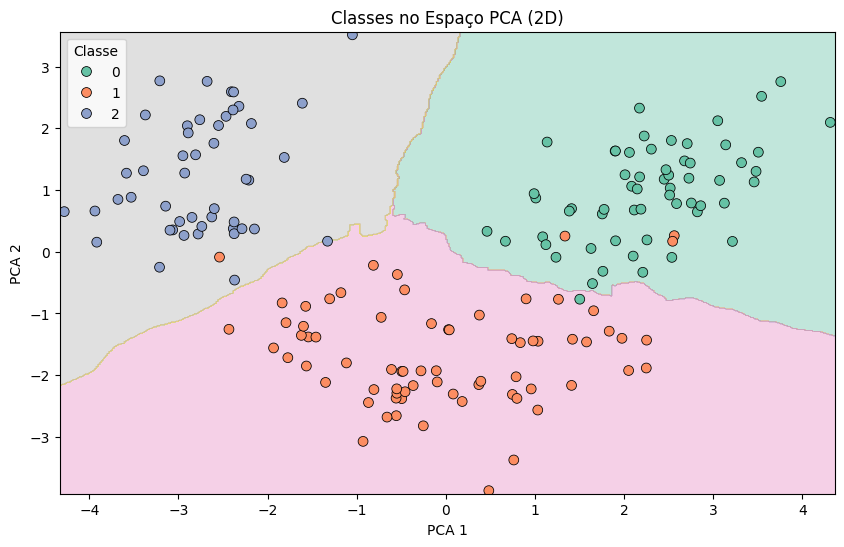

In [141]:
# Gráfico de dispersão com as classes preditas no espaço PCA
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z_linear, cmap="Set2", alpha=0.4)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="Set2", s=50, edgecolor='k')

# Labels, legenda, titulo...
plt.title("Classes no Espaço PCA (2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Classe')
plt.show()
